In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from gptomics import plot
from models import Linear_model

In [2]:
apply_sleep = np.asarray(pd.read_csv(filepath_or_buffer="./apply_sleep"))
apply_speed = np.asarray(pd.read_csv(filepath_or_buffer="./apply_speed"))
produce_sleep = np.asarray(pd.read_csv(filepath_or_buffer="./produce_sleep"))
produce_speed = np.asarray(pd.read_csv(filepath_or_buffer="./produce_speed"))
network_sleep = np.asarray(pd.read_csv(filepath_or_buffer="./network_sleep"))
network_speed = np.asarray(pd.read_csv(filepath_or_buffer="./network_speed"))

went backwards
m grad is -0.48042649478624294
b grad is -2.0550176923316408
old m is 0
new m is 0.02402132473931215
old b is 0
new b is 0.10275088461658205
went backwards
m grad is -0.4235990882669929
b grad is -1.8373380236578505
old m is 0.02402132473931215
new m is 0.0452012791526618
old b is 0.10275088461658205
new b is 0.19461778579947459
went backwards
m grad is -0.37284971950434986
b grad is -1.6428667887065638
old m is 0.0452012791526618
new m is 0.06384376512787929
old b is 0.19461778579947459
new b is 0.2767611252348028
went backwards
m grad is -0.3275301743187315
b grad is -1.4691290773889774
old m is 0.06384376512787929
new m is 0.08022027384381586
old b is 0.2767611252348028
new b is 0.35021757910425166
went backwards
m grad is -0.2870613636605805
b grad is -1.3139139016238357
old m is 0.08022027384381586
new m is 0.09457334202684489
old b is 0.35021757910425166
new b is 0.41591327418544344
went backwards
m grad is -0.2509259521716835
b grad is -1.1752460509458786
old m is

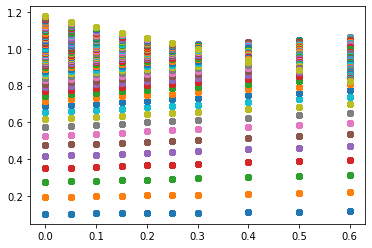

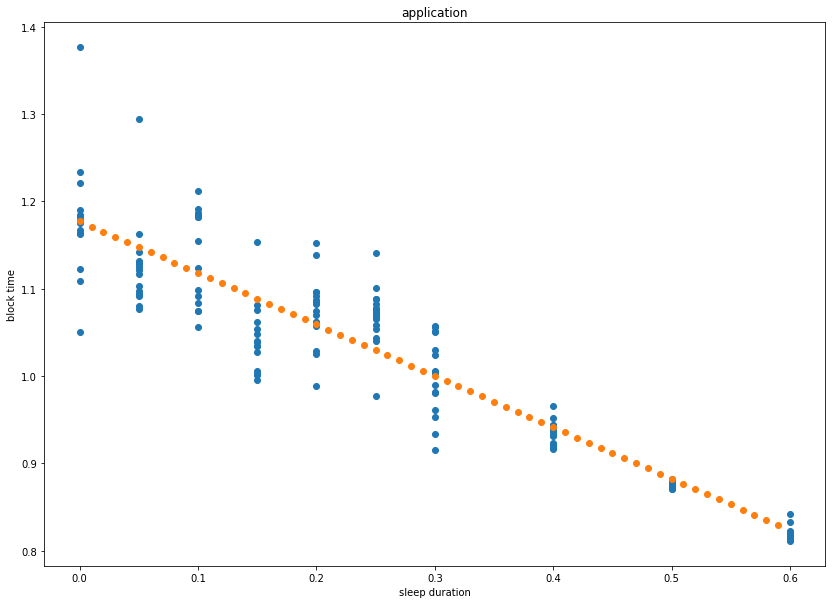

In [10]:
model = Linear_model(0, 0 ,.05)
model.learn(apply_sleep, apply_speed, 3000)

plt.figure(figsize=(14,10))
plt.title(label="application")
plt.xlabel("sleep duration")
plt.ylabel("block time")
plt.scatter(apply_sleep,apply_speed)

xs = np.arange(min(apply_sleep),max(apply_sleep),.01)
model.ev(xs)
plt.scatter(xs, model.guess)

went backwards
m grad is -0.47659007371604534
b grad is -2.0544645663710988
old m is 0
new m is 0.023829503685802268
old b is 0
new b is 0.10272322831855495
went backwards
m grad is -0.41925234691273744
b grad is -1.836794976078683
old m is 0.023829503685802268
new m is 0.04479212103143914
old b is 0.10272322831855495
new b is 0.1945629771224891
went backwards
m grad is -0.368056247732085
b grad is -1.642362888867641
old m is 0.04479212103143914
new m is 0.06319493341804339
old b is 0.1945629771224891
new b is 0.27668112156587116
went backwards
m grad is -0.3223459216963271
b grad is -1.4686870397449248
old m is 0.06319493341804339
new m is 0.07931222950285974
old b is 0.27668112156587116
new b is 0.3501154735531174
went backwards
m grad is -0.2815355460580945
b grad is -1.3135511109551619
old m is 0.07931222950285974
new m is 0.09338900680576447
old b is 0.3501154735531174
new b is 0.4157930291008755
went backwards
m grad is -0.24510185187364864
b grad is -1.174975441148979
old m is 0

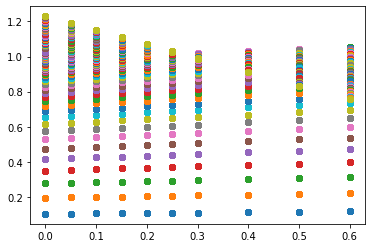

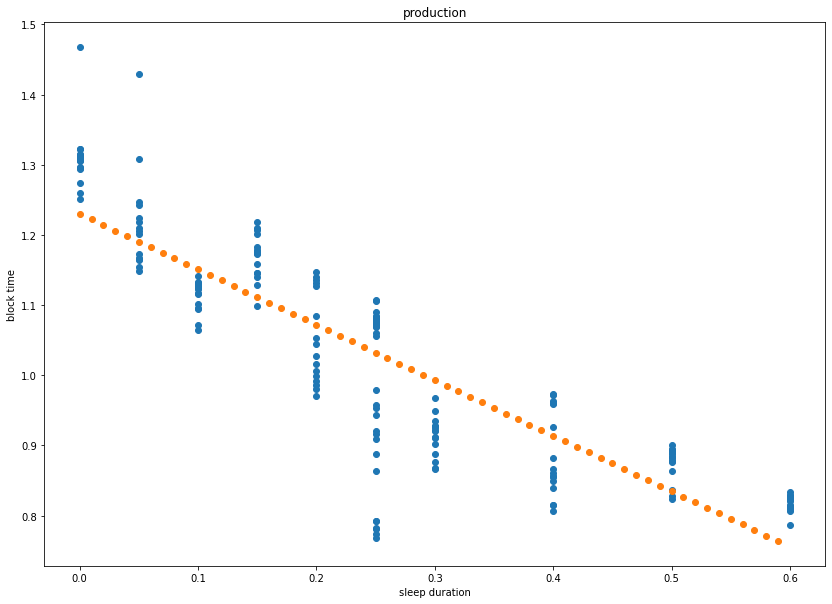

In [11]:

model = Linear_model(0, 0 ,.05)
model.learn(produce_sleep, produce_speed, 2000)

plt.figure(figsize=(14,10))
plt.title(label="production")
plt.xlabel("sleep duration")
plt.ylabel("block time")
plt.scatter(produce_sleep,produce_speed)

data = np.arange(0,.7,.01)
xs = np.arange(min(produce_sleep),max(produce_sleep),.01)
model.ev(xs)
plt.scatter(xs, model.guess)

In [7]:
import torch
from torch.autograd import Variable

class Linear_model_pt(torch.nn.Module):
  def __init__(self, inputSize, outputSize):
    super(Linear_model_pt, self).__init__()
    self.linear = torch.nn.Linear(inputSize, outputSize)
    
  def forward(self, x):
    out = self.linear(x)
    return out
    
if torch.cuda.is_available():
    model.cuda()

inputdim = produce_sleep.shape
outputdim = produce_speed.shape
learningrate = 0.01
epochs = 100

model = Linear_model_pt(inputdim, outputdim)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningrate)

TypeError: empty() received an invalid combination of arguments - got (tuple, dtype=NoneType, device=NoneType), but expected one of:
 * (tuple of ints size, *, tuple of names names, torch.memory_format memory_format, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (tuple of ints size, *, torch.memory_format memory_format, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)


In [ ]:
for epoch in range(epochs):
  inputs = Variable(torch.from_numpy(produce_sleep))
  labels = Variable(torch.from_numpy(produce_speed))
  
  optimizer.zero_grad()

  outputs = model(inputs)
  loss = criterion(outputs, labels)
  print(loss)
  loss.backward()

  optimizer.step


In [ ]:
predicted = model(Variable(torch.from_numpy(produce_sleep))).data.numpy()
print(predicted)

NameError: name 'predicted' is not defined

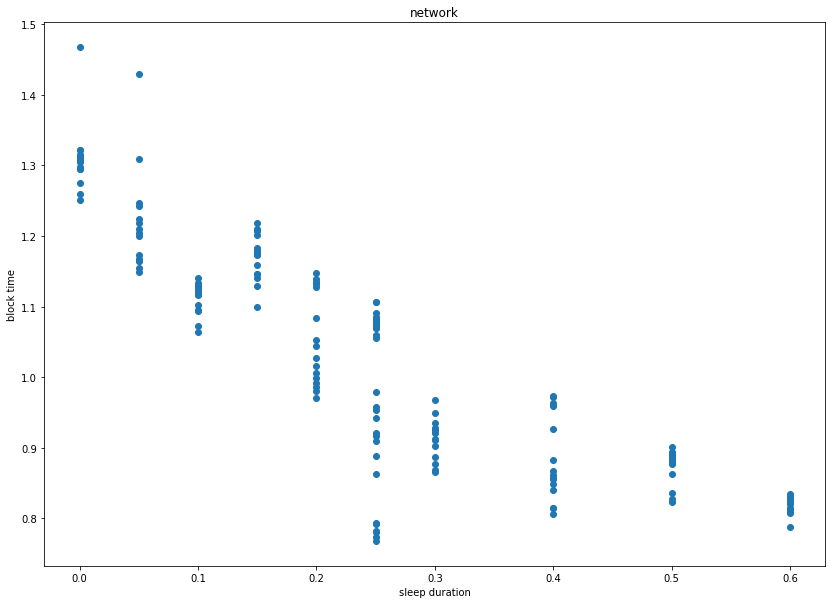

In [12]:
plt.figure(figsize=(14,10))
plt.title(label="network")
plt.xlabel("sleep duration")
plt.ylabel("block time")
plt.scatter(produce_sleep,produce_speed)

plt.scatter(produce_sleep, predicted)
plt.scatter(xs, model.guess)

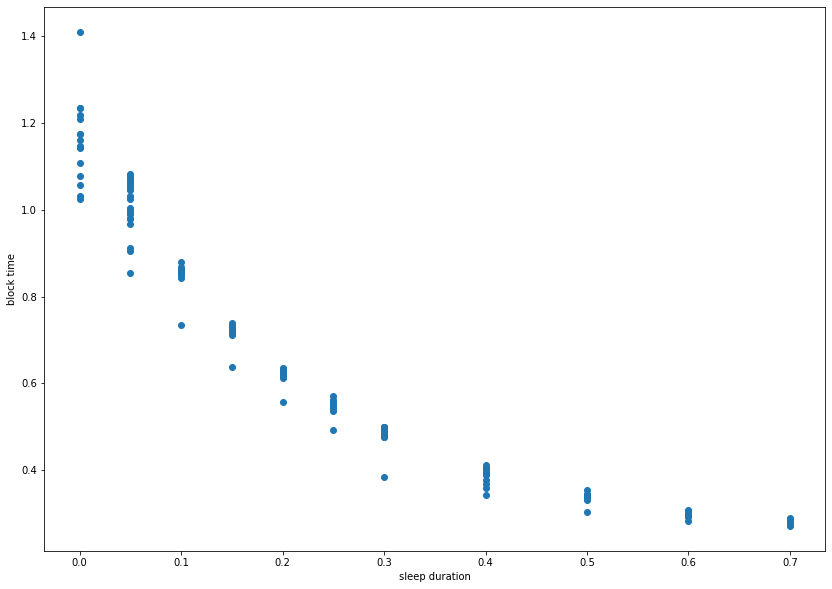

In [ ]:
# 1/e^x

plt.figure(figsize=(14,10))
plt.xlabel("sleep duration")
plt.ylabel("block time")
plt.scatter(network_sleep,network_speed)

In [ ]:
from models import full_model 